# Blood Pressure

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy import signal
import os
from operator import itemgetter

2672021-7143-MDC_PRESS_BLD_ART_ABP-125.csv:


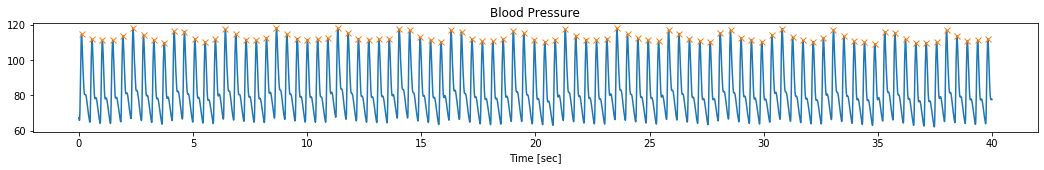

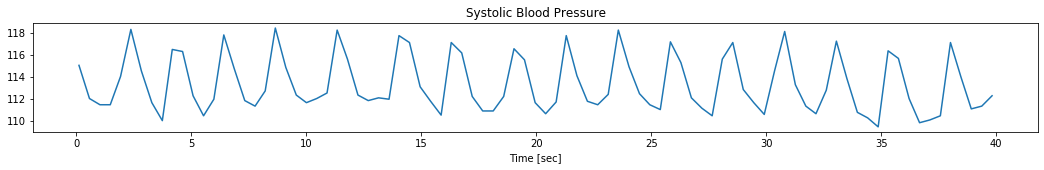

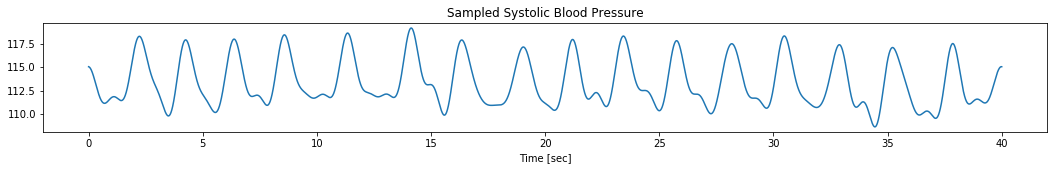

In [3]:
START_POINT=0
END_POINT=40
t = np.arange(START_POINT, END_POINT, 0.008)
F = 1000

size = len(t)
bp = []
sys_list = []

for filename in os.listdir('samples'):
    if "MDC_PRESS_BLD_ART_ABP-125" in filename: 
        print(filename+':')
        with open('samples/'+ filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                bp.append((0.0625*float(row[1]))-40)
            
            bp_small = np.array(bp[START_POINT*125:END_POINT*125])
            peaks,_= find_peaks(bp_small, prominence=1, distance=42)
            peaks_sec = (peaks + START_POINT*125) * 0.008
            sys = bp_small[peaks]
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,bp_small)
            plt.plot(peaks_sec, bp_small[peaks], "x")
            plt.title('Blood Pressure')
            plt.xlabel('Time [sec]')
            plt.show()
            bp = []
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,sys)
            plt.title('Systolic Blood Pressure')
            plt.xlabel('Time [sec]')
            plt.show()
            
            sampled_sys = signal.resample(sys, F*(END_POINT-START_POINT))
            sampled_t = np.arange(START_POINT, END_POINT, 1/F)
            
            plt.figure(figsize=(18, 2))
            plt.plot(sampled_t,sampled_sys)
            plt.title('Sampled Systolic Blood Pressure')
            plt.xlabel('Time [sec]')
            plt.show()

            sys_list.append(sampled_sys)
